<a href="https://colab.research.google.com/github/dzejkopjarosinski/ZespolR/blob/main/Projekt_MLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
tickerSymbol = '^GSPC'
start_date = '2003-01-01'
end_date = '2023-03-30'

sp500_data = yf.download(tickerSymbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
sp500_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,879.820007,909.030029,879.820007,909.030029,909.030029,1229200000
2003-01-03,909.030029,911.250000,903.070007,908.590027,908.590027,1130800000
2003-01-06,908.590027,931.770020,908.590027,929.010010,929.010010,1435900000
2003-01-07,929.010010,930.809998,919.929993,922.929993,922.929993,1545200000
2003-01-08,922.929993,922.929993,908.320007,909.929993,909.929993,1467600000


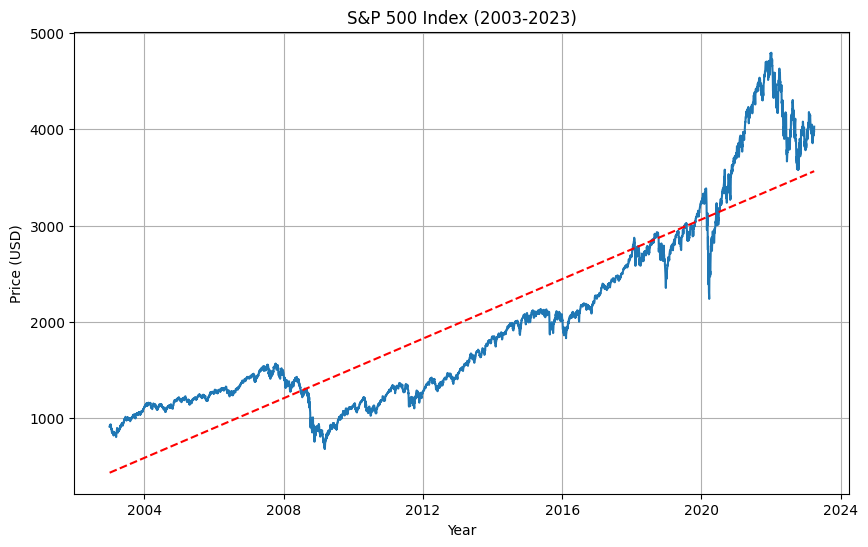

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(10,6))
plt.plot(sp500_data['Close'])
plt.title('S&P 500 Index (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)


x = mdates.date2num(sp500_data.index)
y= sp500_data.Close
z = np.polyfit(x,y, 1)
p = np.poly1d(z)
#then the plot

plt.plot(x, p(x), "r--")


In [ ]:
sp500_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5.095000e+03
mean,1997.120250,2008.661148,1984.783631,1997.481028,1997.481028,3.615895e+09
std,1012.408145,1018.079743,1006.124729,1012.430192,1012.430192,1.387298e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1215.340027,1222.725037,1209.519958,1215.655029,1215.655029,2.827645e+09
50%,1544.439941,1549.199951,1536.430054,1545.800049,1545.800049,3.587520e+09
75%,2644.389893,2661.155029,2622.794922,2642.039917,2642.039917,4.294310e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [ ]:
sp500_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,879.820007,909.030029,879.820007,909.030029,909.030029,1229200000
2003-01-03,909.030029,911.250000,903.070007,908.590027,908.590027,1130800000
2003-01-06,908.590027,931.770020,908.590027,929.010010,929.010010,1435900000
2003-01-07,929.010010,930.809998,919.929993,922.929993,922.929993,1545200000
2003-01-08,922.929993,922.929993,908.320007,909.929993,909.929993,1467600000


In [ ]:
# Calculating moveing averages 
ma_day = [10, 20, 50, 99, 180]

for ma in ma_day:
  column_name = f'MA {ma}'
  sp500_data[column_name] = sp500_data['Close'].rolling(ma).mean()

Text(0, 0.5, 'Price (USD)')

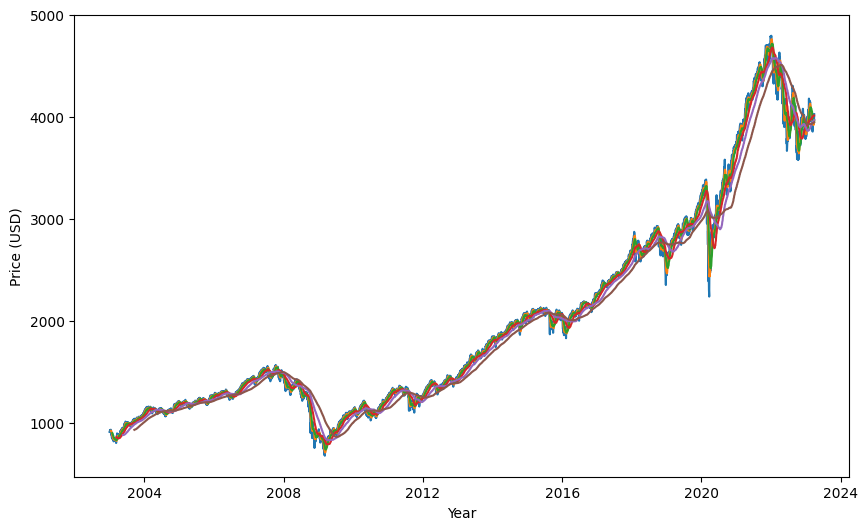

In [ ]:
#Visualize the moving averages
plt.figure(figsize=(10,6))
plt.plot(sp500_data[['Close', 'MA 10', 'MA 20', 'MA 50', 'MA 99','MA 180']])
plt.xlabel('Year')
plt.ylabel('Price (USD)')


In [ ]:
sp500_data.head(200)

,Open,High,Low,Close,Adj Close,Volume,MA 10,MA 20,MA 50,MA 99,MA 180
Date,,,,,,,,,,,
2003-01-02,879.820007,909.030029,879.820007,909.030029,909.030029,1229200000,NaN,NaN,NaN,NaN,NaN
2003-01-03,909.030029,911.250000,903.070007,908.590027,908.590027,1130800000,NaN,NaN,NaN,NaN,NaN
2003-01-06,908.590027,931.770020,908.590027,929.010010,929.010010,1435900000,NaN,NaN,NaN,NaN,NaN
2003-01-07,929.010010,930.809998,919.929993,922.929993,922.929993,1545200000,NaN,NaN,NaN,NaN,NaN
2003-01-08,922.929993,922.929993,908.320007,909.929993,909.929993,1467600000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2003-10-10,1038.729980,1040.839966,1035.739990,1038.060059,1038.060059,1108100000,1025.502997,1023.117996,1008.818600,997.047980,940.749944
2003-10-13,1038.060059,1048.900024,1038.060059,1045.349976,1045.349976,1040500000,1029.379993,1024.644995,1010.122599,998.194242,941.849221
2003-10-14,1045.349976,1049.489990,1040.839966,1049.479980,1049.479980,1271900000,1034.730994,1025.652997,1011.455798,999.368586,942.909999


In [ ]:
# Calculate the percentage change of the 'Close' column and store it in a new column called 'Pct_Change'
sp500_data['Pct_Change'] = sp500_data['Close'].pct_change()

# Calculate the mean value of the 'Pct_Change' column
mean_pct_change = sp500_data['Pct_Change'].mean()

# Create a new DataFrame with the mean value
df = pd.DataFrame({'Mean_Pct_Change': mean_pct_change}, index=[2003,2004,2005])


In [ ]:
df

,Mean_Pct_Change
2003,0.000366
2004,0.000366
2005,0.000366


In [ ]:
# Group the data by year and calculate the mean value of the 'Pct_Change' column for each year
y_change = pd.DataFrame(sp500_data.groupby(sp500_data.index.year)['Pct_Change'].mean())

# Rename the columns to 'Year' and 'Mean_Pct_Change'
y_change = y_change.reset_index().rename(columns={'Date': 'Year', 'Pct_Change': 'Mean_Pct_Change'})

,Mean_Pct_Change
2003,0.000366
2004,0.000366
2005,0.000366


In [ ]:
# Define threshold for price change
threshold = 0.00001

# Calculate daily percentage change in Close price
sp500_data['Pct_Change'] = sp500_data['Close'].pct_change()
print(sp500_data['Pct_Change'].mean)

# Define a list to store color values
sp500_data['colors'] = ['black'] * len(sp500_data)

sp500_data['data'] = pd.to_datetime(sp500_data.index, format='%Y-%m-%d')
sp500_data['year'] = sp500_data['data'].dt.year
print(sp500_data.head())


sp500_data = sp500_data.groupby('year').mean()




# Color the steep downfalls in red
sp500_data['colors'][sp500_data['Pct_Change'] < -threshold] = 'red'

# Color the steep increases in price on green
sp500_data['colors'][sp500_data['Pct_Change'] > threshold] = 'green'

# Plot the data with colored markers
plt.figure(figsize=(10,6))
plt.scatter(sp500_data.index, sp500_data['Close'], color=sp500_data['colors'])
plt.title('S&P 500 Index (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


<bound method NDFrame._add_numeric_operations.<locals>.mean of Date
2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2023-03-23    0.002985
2023-03-24    0.005640
2023-03-27    0.001647
2023-03-28   -0.001574
2023-03-29    0.014237
Name: Pct_Change, Length: 5095, dtype: float64>
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2003-01-02  879.820007  909.030029  879.820007  909.030029  909.030029   
2003-01-03  909.030029  911.250000  903.070007  908.590027  908.590027   
2003-01-06  908.590027  931.770020  908.590027  929.010010  929.010010   
2003-01-07  929.010010  930.809998  919.929993  922.929993  922.929993   
2003-01-08  922.929993  922.929993  908.320007  909.929993  909.929993   

                Volume  Pct_Change colors       data  year  
Date                                               

<ipython-input-10-4cf246b2da0a>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp500_data = sp500_data.groupby('year').mean()


KeyError: ignored